In [426]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [428]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")


In [430]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


## Data cleaning

In [433]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [435]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [437]:
df = df.drop( "Unnamed: 0", axis = 1)

In [439]:
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [441]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [443]:
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [445]:
df[df["Acreage(Hectare)"].isnull()]

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [447]:
df = df.dropna().reset_index().drop("index", axis = 1)

In [449]:
df

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


In [451]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [453]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [455]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

In [457]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [459]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## how many countries produce sugarcane from each continent !

In [461]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

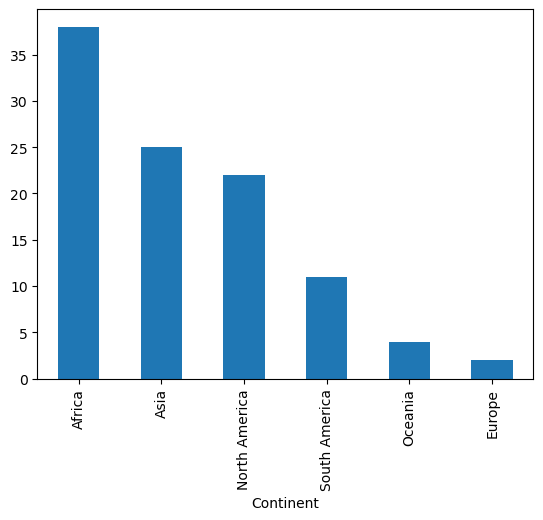

In [462]:
df["Continent"].value_counts().plot(kind = "bar")

In [463]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


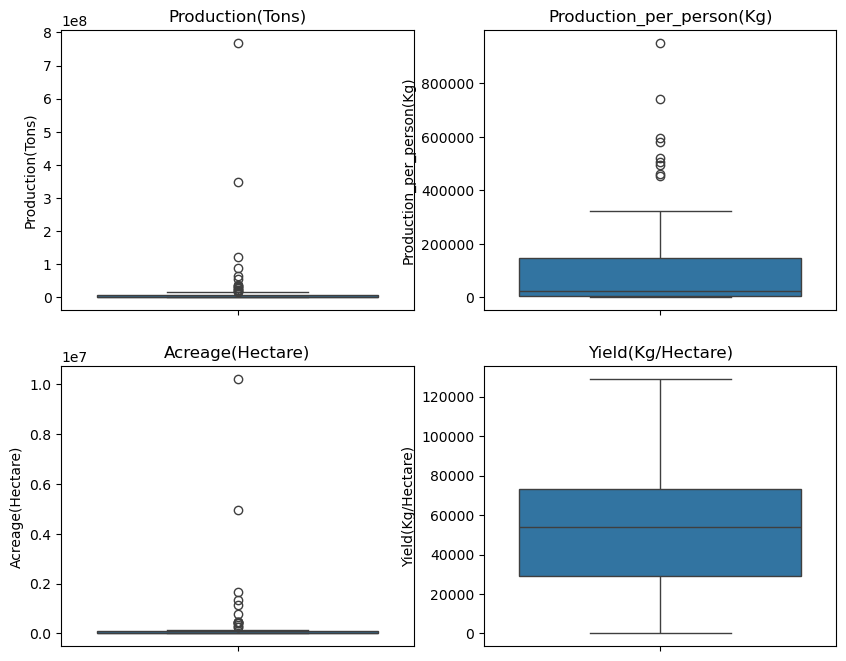

In [464]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()

## Distributed of the columns

C:\Users\thoka\AppData\Local\Temp\ipykernel_16548\1909675950.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\thoka\AppData\Local\Temp\ipykernel_16548\1909675950.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_person(Kg)"])
C:\Users\thok

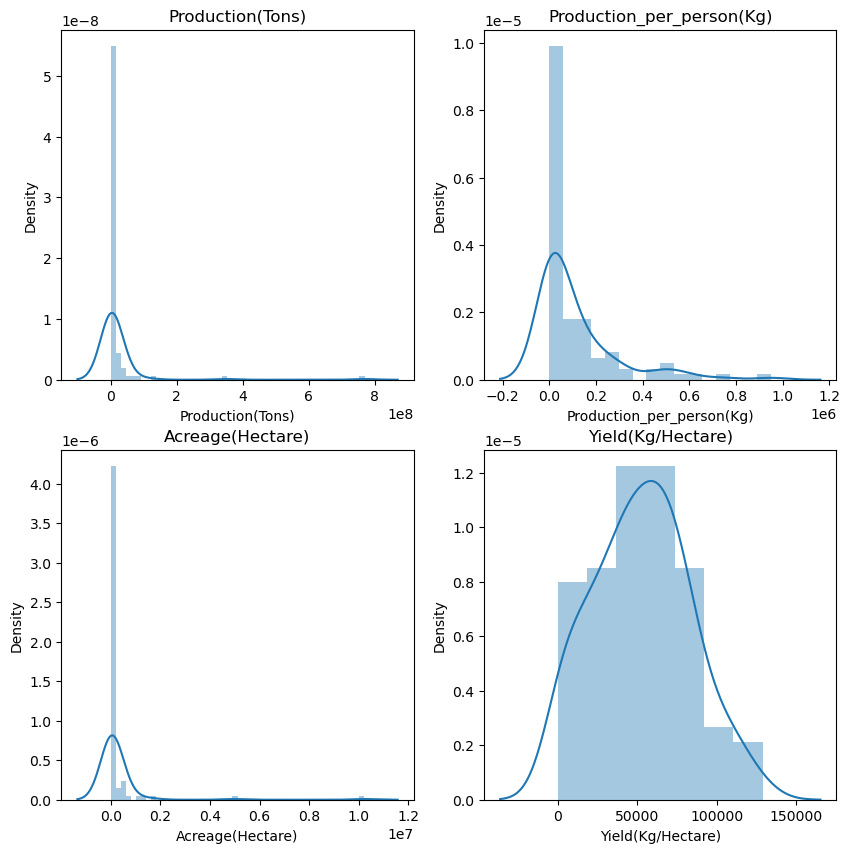

In [466]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.distplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()

<Axes: ylabel='Production(Tons)'>

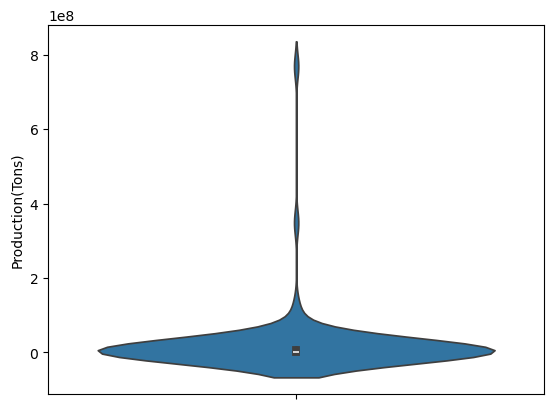

In [468]:
sns.violinplot(df["Production(Tons)"])


## Bivariate analysis

In [470]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## maximum sugercane !

In [472]:
df_new = df[["Country","Production(Tons)"]].set_index("Country")

In [473]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [474]:
df_new["Production(Tons)_percent"] = df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()


In [475]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

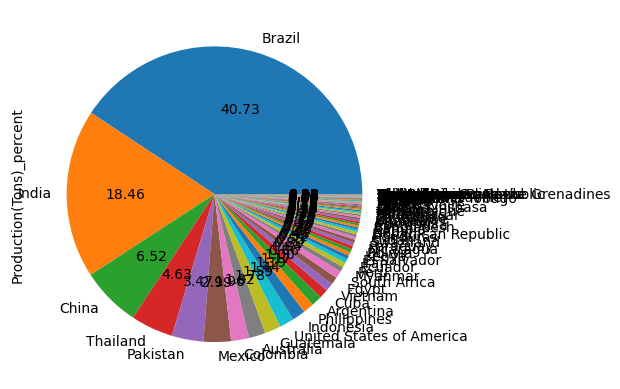

In [476]:
df_new["Production(Tons)_percent"].plot(kind = "pie", autopct = "%.2f")


<Axes: xlabel='Country'>

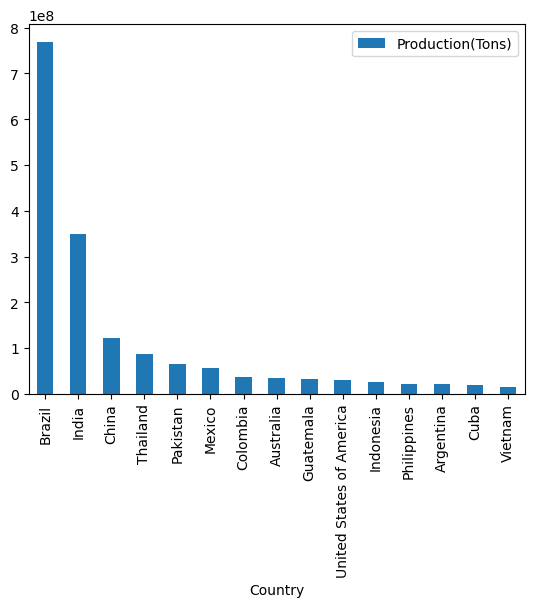

In [477]:
df[["Country","Production(Tons)"]].set_index("Country").sort_values("Production(Tons)", ascending = False).head(15).plot(kind = "bar")


C:\Users\thoka\AppData\Local\Temp\ipykernel_16548\2823669880.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


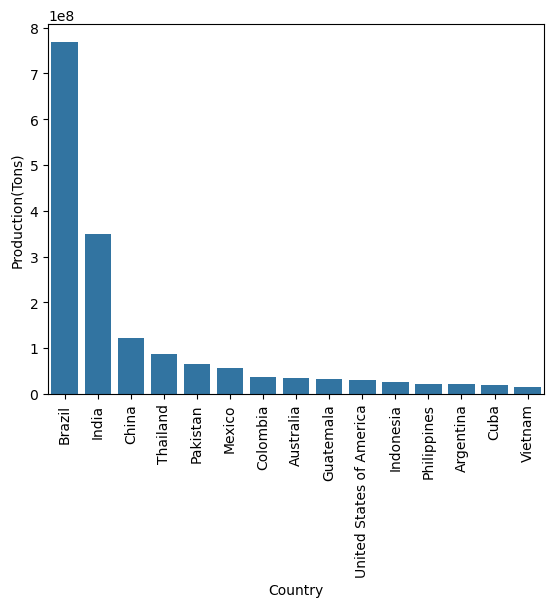

In [478]:
ax = sns.barplot(data = df.head(15),  x= "Country", y = "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

## Which country has highest land !

C:\Users\thoka\AppData\Local\Temp\ipykernel_16548\2973715568.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


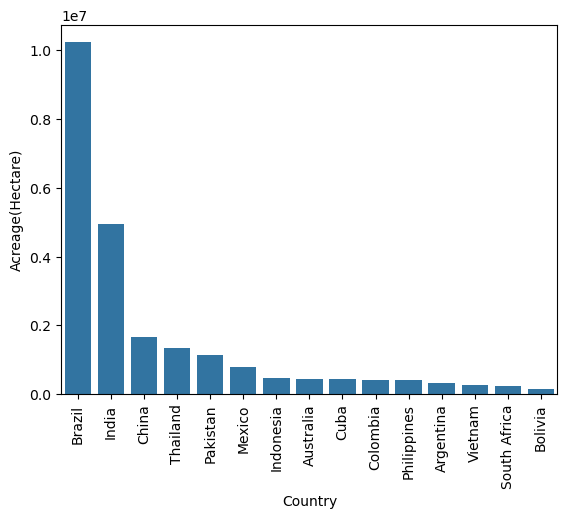

In [480]:
df_acr = df.sort_values("Acreage(Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_acr,  x= "Country", y = "Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

## Which country has highest yeild per hectare !

C:\Users\thoka\AppData\Local\Temp\ipykernel_16548\2860594357.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


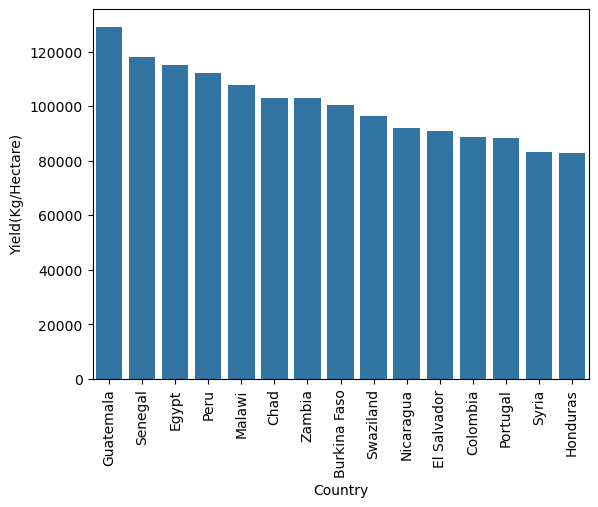

In [482]:
df_yield = df.sort_values("Yield(Kg/Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

## Which country has highest production!

C:\Users\thoka\AppData\Local\Temp\ipykernel_16548\328127327.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


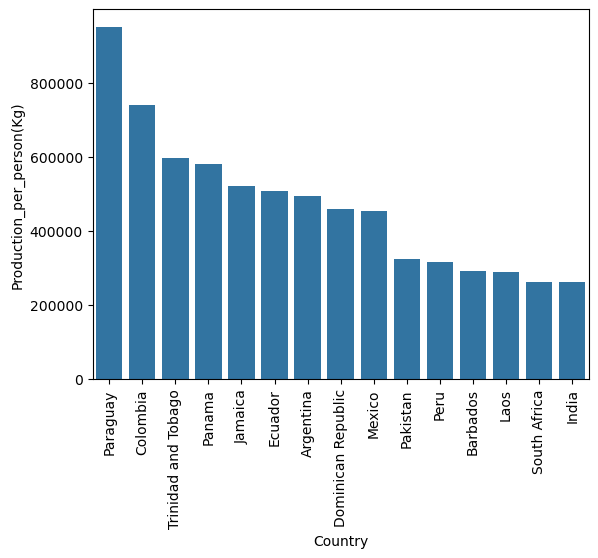

In [484]:
df_yield = df.sort_values("Production_per_person(Kg)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Production_per_person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

## Do countries which yield more sugarcane per hectare produces more sugarcane in total?


<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

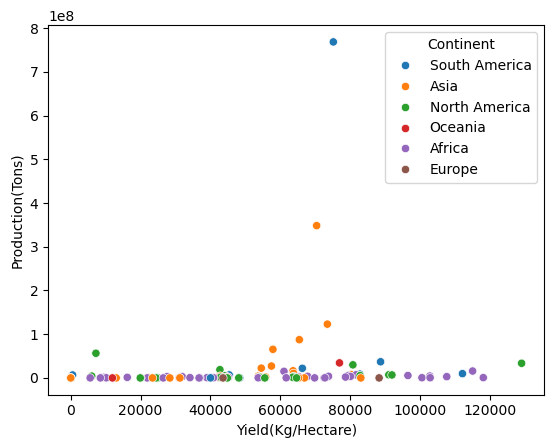

In [489]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)" , y = "Production(Tons)", hue = "Continent")

In [490]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## Analysis for Continent 

In [554]:
df_continent = df.groupby("Continent").sum()

In [558]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [560]:
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


<Axes: xlabel='Continent'>

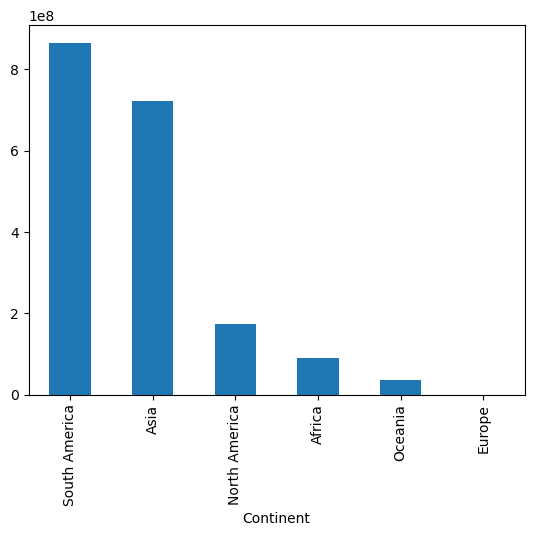

In [564]:
df_continent["Production(Tons)"].sort_values(ascending =  False).plot(kind = "bar")

## Do number of countries in a Cintient effect production of sugarcane !

NameError: name 'continent_names' is not defined

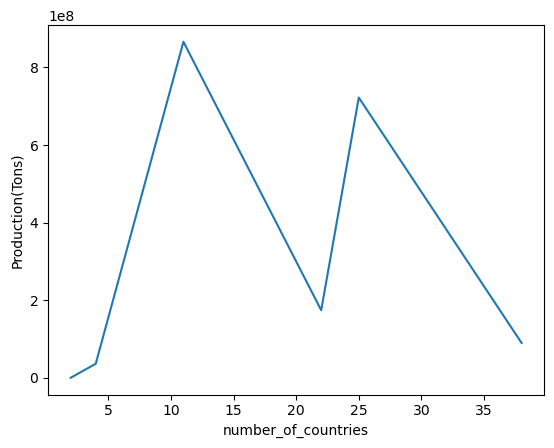

In [573]:
cntinent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

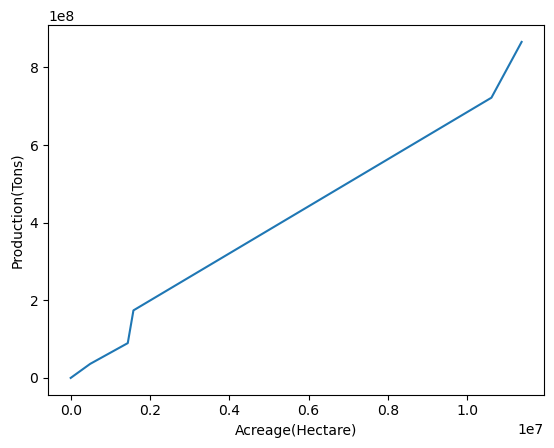

In [575]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )

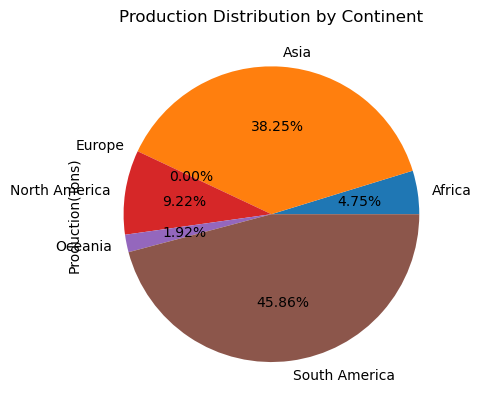

In [577]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()